In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

In [3]:
'''
covid_df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
'''

'''
response = requests.get("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

with open('covid_data.csv', 'wb') as file:
    file.write(response.content)
'''


covid_df = pd.read_csv("covid_data.csv")

In [11]:
covid_df.sample(100)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
215670,NPL,Asia,Nepal,2022-03-27,978332.0,15.0,25.286,11951.0,0.0,0.143,...,37.8,47.782,0.3,70.78,0.602,30547586.0,NaN,NaN,NaN,NaN
230496,OWID_CYN,Asia,Northern Cyprus,2021-09-10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,382836.0,NaN,NaN,NaN,NaN
68453,COK,Oceania,Cook Islands,2023-05-30,7120.0,0.0,2.000,2.0,0.0,0.000,...,NaN,NaN,NaN,76.25,NaN,17032.0,NaN,NaN,NaN,NaN
308621,TWN,Asia,Taiwan,2022-04-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,23893396.0,NaN,NaN,NaN,NaN
161597,KIR,Oceania,Kiribati,2022-01-17,NaN,0.0,0.000,NaN,0.0,0.000,...,58.9,NaN,1.9,68.37,0.630,131237.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146742,IRQ,Asia,Iraq,2023-07-16,2465545.0,0.0,0.000,25375.0,0.0,0.000,...,NaN,94.576,1.4,70.60,0.674,44496124.0,NaN,NaN,NaN,NaN
41143,BWA,Africa,Botswana,2021-06-22,70071.0,1684.0,608.000,1095.0,26.0,22.143,...,34.4,NaN,1.8,69.59,0.735,2630300.0,NaN,NaN,NaN,NaN
234706,NOR,Europe,Norway,2022-10-27,1465034.0,118.0,92.571,4273.0,0.0,3.571,...,20.7,NaN,3.6,82.40,0.957,5434324.0,NaN,NaN,NaN,NaN
221748,NIC,North America,Nicaragua,2023-07-17,15951.0,0.0,4.429,245.0,0.0,0.000,...,NaN,NaN,0.9,74.48,0.660,6948395.0,NaN,NaN,NaN,NaN


In [54]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353744 entries, 0 to 353743
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    353744 non-null  object 
 1   continent                                   336922 non-null  object 
 2   location                                    353744 non-null  object 
 3   date                                        353744 non-null  object 
 4   total_cases                                 315748 non-null  float64
 5   new_cases                                   344151 non-null  float64
 6   new_cases_smoothed                          342892 non-null  float64
 7   total_deaths                                294071 non-null  float64
 8   new_deaths                                  344196 non-null  float64
 9   new_deaths_smoothed                         342966 non-null  float64
 

What kind of information could be used for data analysis:
1. Line chart: how new cases and total cases increases over time.
2. Varied death rate across continent/countries. (total_deaths_per_million in a specific date)
3. Cases -> hosp_patients -> icu_patients -> death. 
4. Number of vaccinations/boosters vs new cases.
5. People_fully_vaccinated_per_hundred across different countries.

hypothesis:
1. Countries that have a better public health enviroment(handwashing_facilities, hospital_beds_per_thousand) could decrease the death/icu rate.
2. Rich countries(life_expectancy) have a higher vaccination rate.
3. What's the most relevant features concerning excess_mortality.

In [ ]:
covid_df.info()

## 1. Univariate Exploration

Here we want to understand the frequency and distribution of a single variable.

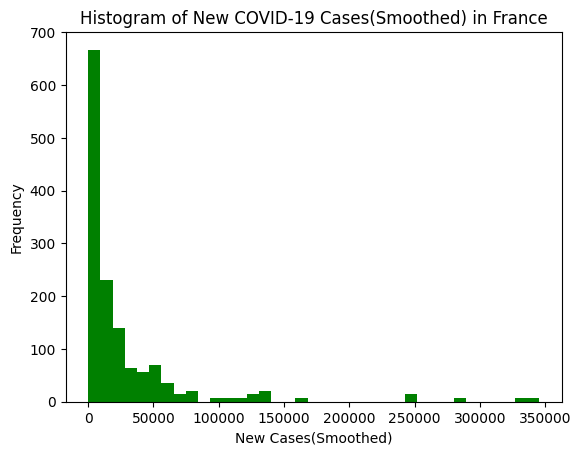

In [18]:
# histograms of new cases(smoothed) in france 

france_new_cases_smoothed = covid_df[covid_df['location'] == 'France']['new_cases_smoothed'].dropna()

bins_sqrt = int(np.sqrt(len(france_new_cases_smoothed)))


plt.hist(france_new_cases_smoothed, bins=bins_sqrt,color='green')  
plt.xlabel('New Cases(Smoothed)')
plt.ylabel('Frequency')
plt.title('Histogram of New COVID-19 Cases(Smoothed) in France')
plt.show()

Observations:
- The distribution of new COVID-19 cases (smoothed) in France is highly right-skewed.
- The majority of the data points are concentrated in the first bin, suggesting that on most days, the number of new cases was relatively low (close to zero, up to the upper limit of the first bin).
- The tail of the distribution extends to the right, suggesting that there were a few days with a higher number of new case. 

In [46]:
def return_cols_row(list_name, cols = 4):
    n = len(list_name)
    rows = int(np.ceil(n / cols))  

    return rows, cols

In [55]:
# create lists for each continent
continent_list = covid_df['continent'].dropna().unique().tolist()

continent_list

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [52]:
# histograms of new cases(smoothed) in each continent 

def create_histograms(ax, continent_name):
    continent_df = covid_df[covid_df['continent'] == continent_name]
    new_cases_smoothed = continent_df['new_cases_smoothed'].dropna()

    bins_sqrt = int(np.sqrt(len(new_cases_smoothed))) if len(new_cases_smoothed) > 0 else 1


    ax.hist(new_cases_smoothed, bins=bins_sqrt,color='green')  
    ax.set_xlabel('New Cases(Smoothed)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{continent_name}')


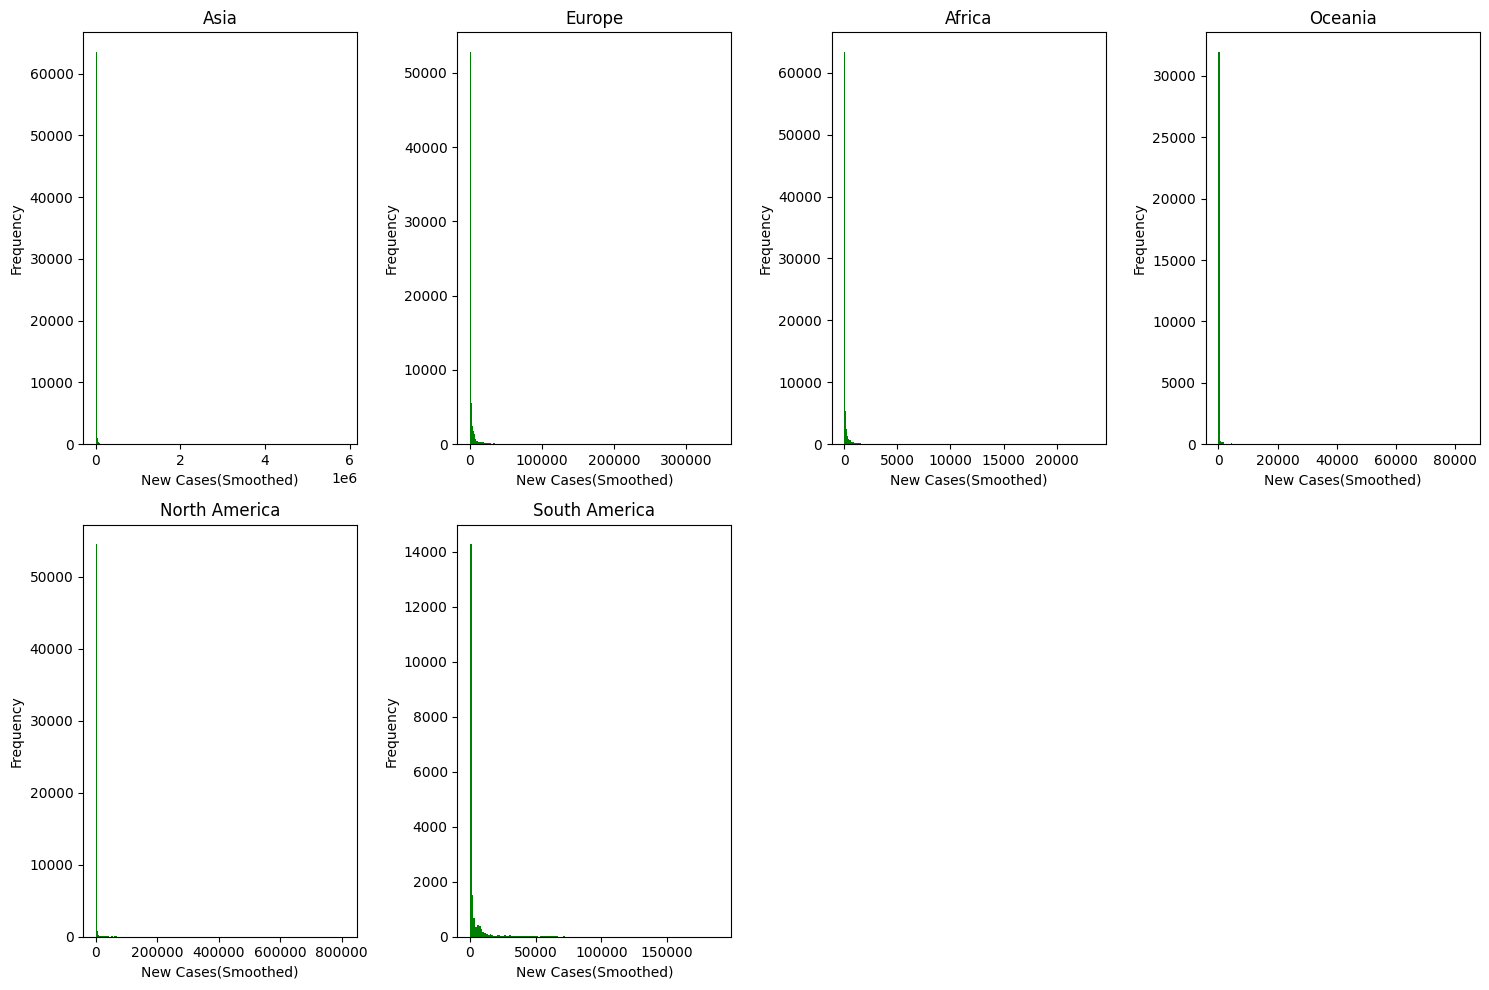

In [53]:
rows, cols = return_cols_row(continent_list)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

axs = axs.flatten()

for idx, continent_name in enumerate(continent_list):
    create_histograms(axs[idx], continent_name)

for j in range(idx + 1, rows * cols):
    axs[j].set_visible(False)
    
plt.tight_layout()
plt.show()

## 2. Bivariate Visualization

Q: How total cases increase over time in each countries?

In [59]:
countries_list = covid_df['location'].dropna().unique().tolist()
len(countries_list)

# as there are 255 countries, it would be better if we focus on several countries
target_countries_list = ['France','China','Kenya','Canada','Australia','India']
target_countries_list

['France', 'China', 'Kenya', 'Canada', 'Australia', 'India']

In [65]:
# histograms of new cases(smoothed) in each continent 

def create_barplots_total_cases(ax, country_name):
    country_df = covid_df[covid_df['location'] == country_name]
    total_cases = country_df['total_cases'].dropna()
    country_df['date'] = pd.to_datetime(country_df['date'])


    ax.bar(total_cases, bins=bins_sqrt,color='green')  
    ax.set_xlabel('New Cases(Smoothed)')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{continent_name}')


In [66]:
def create_plots(list_name, plot_function, cols = 4):
    rows, cols = return_cols_row(list_name, cols)

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

    axs = axs.flatten()

    for idx, name in enumerate(list_name):
        plot_function(axs[idx], name)

    for j in range(idx + 1, rows * cols):
        axs[j].set_visible(False)
        
    plt.tight_layout()
    plt.show()

TypeError: Axes.bar() missing 1 required positional argument: 'height'

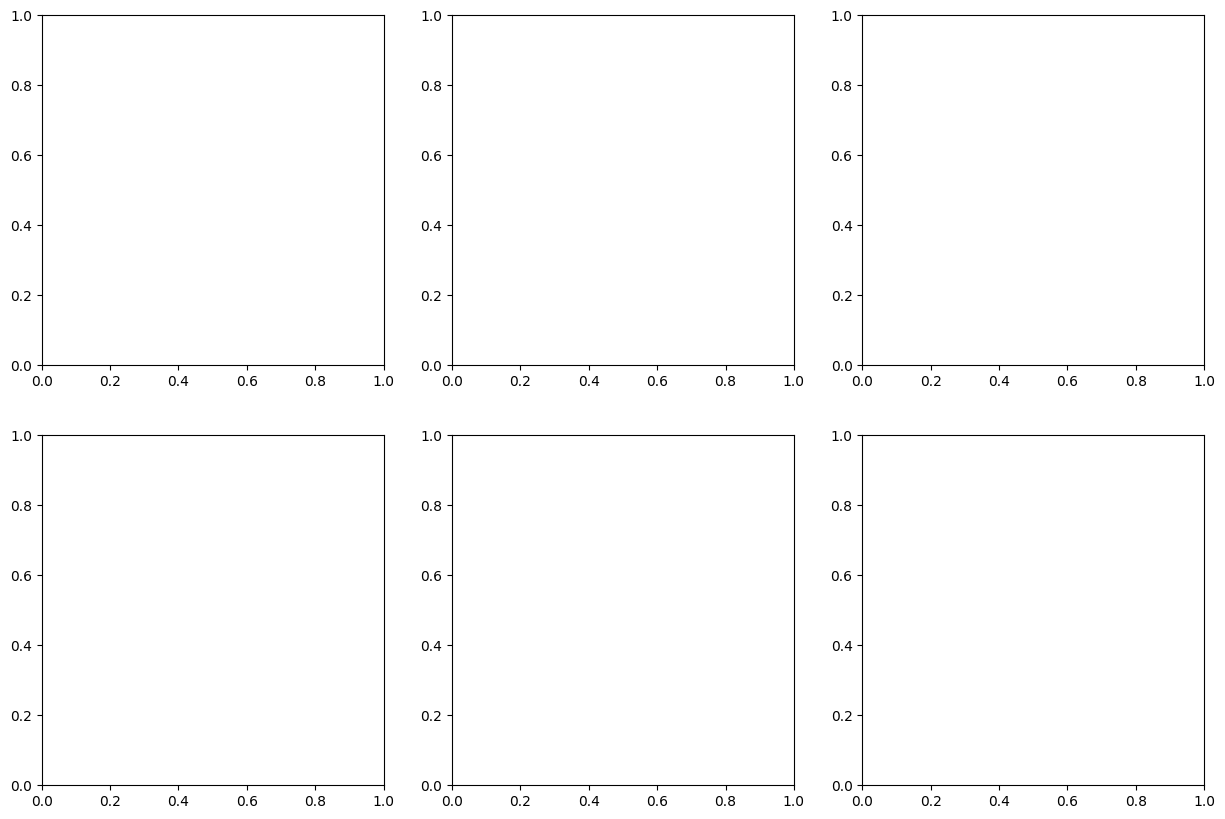

In [67]:
create_plots(target_countries_list, create_barplots_total_cases, cols =3 )